# AMCPR Sample Logs 

Analysis of sample log.

In [1]:
#dependencies:
#for the data-organizing
from datetime import datetime
import csv
import pandas as pd

#for analysis
import numpy as np
import matplotlib.pyplot as plt

#for graphing:
import plotly.express as px


#for machine learning:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#skips the ones that don't fit pretty
data = pd.read_csv('Audit20201117_adminuser_wHeader.txt', sep="|", header=0, error_bad_lines=False) 

b'Skipping line 3: expected 13 fields, saw 17\nSkipping line 37: expected 13 fields, saw 16\nSkipping line 63: expected 13 fields, saw 17\nSkipping line 98: expected 13 fields, saw 17\nSkipping line 683: expected 13 fields, saw 16\n'


In [3]:
#okay but watch for spacing so: 
print(data.columns.tolist()) 

['fullTimeWithMicro ', 'gethostname() ', "SERVER['REQUEST_METHOD'] ", "'phpdrupal[' . getmypid() . ']' ", 'error_level ', 'current_uid ', 'current_username ', 'session_id ', 'jammex_request_id ', 'current_url ', 'class ', 'caller ', 'to_output']


In [4]:
data[['Date','Time']] = data['fullTimeWithMicro '].str.split('EST', expand=True) #splits the date from time
data['Date'] =  pd.to_datetime(data['Date']) #makes sure the date is a Date not an int
data.head()
data.describe(include='all') #5 num summary (mean, mode, std, min, max) & percentile numbers (if applicable).
#most importantly, count + unique.

C:\Users\salee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


,fullTimeWithMicro,gethostname(),SERVER['REQUEST_METHOD'],'phpdrupal[' . getmypid() . ']',error_level,current_uid,current_username,session_id,jammex_request_id,current_url,class,caller,to_output,Date,Time
count,927,927,927,927,927,927.0,927,927,927,927,927,927,927,927,927
unique,926,1,2,11,1,NaN,1,3,244,64,4,8,141,1,926
top,2020-11-17EST12:11:21.181963920,amcpr.myquotient.net,POST,phpdrupal[247606],INFO,NaN,adminuser,9tSQGsvijvz9nXVDJL1tGO8EYBJ-5Fo4zmK1Uy-I-Jk,jri_5fb4235d67e18,http://amcpr.myquotient.net/update-model/covi...,Drupal\jammex\EventSubscriber\JammexSubscriber,auditPostData,Page access,2020-11-17 00:00:00,12:11:21.181963920
freq,2,927,473,117,927,NaN,927,712,29,56,622,360,245,927,2
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-17 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-17 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 auditPostData             360
 auditAccessObjects        245
 doGet                     225
 doCurlPost                 56
 auditAdminFunction         17
 jammex_entity_presave      12
 buildForm                  10
 jammex_user_presave         2
Name: caller , dtype: int64


<AxesSubplot:title={'center':'Number of Calls by Type'}>

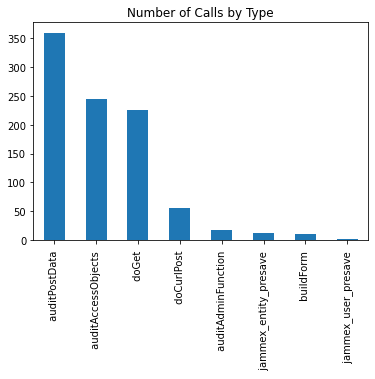

In [5]:
#bar chart of how many calls
data['caller '].value_counts() #how many of each caller we have
print(data['caller '].value_counts())
fig = data['caller '].value_counts().plot(kind ="bar", title = "Number of Calls by Type")
fig

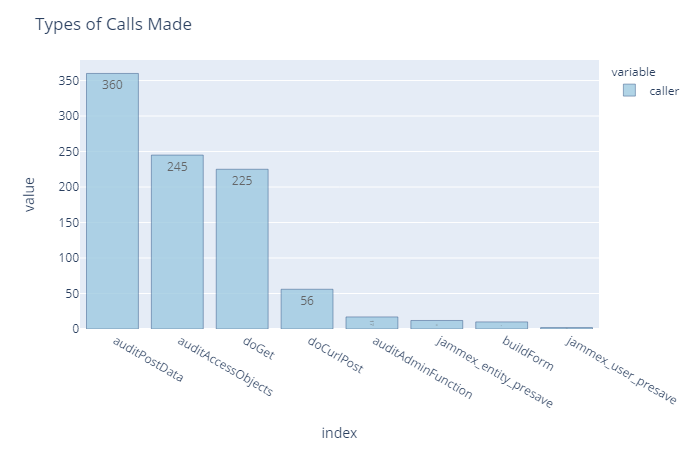

In [6]:
sampledf = pd.DataFrame(data['caller '].value_counts())
fig = px.bar(data['caller '].value_counts())
fig.update_traces(text = sampledf['caller '], textposition='inside')
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=.5, opacity=0.8)
fig.update_layout(title_text='Types of Calls Made')
fig.show("png")